In [1]:
!pip install bresenham



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow

# # from PIL import Image, ImageOps, ImageFilter, ImageEnhance
# from tqdm import tqdm
import math
from bresenham import bresenham as line_iter


In [3]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None:  # use the middle of the image
        center = (int(w / 2), int(h / 2))
    if radius is None:  # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w - center[0], h - center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0]) ** 2 + (Y - center[1]) ** 2)

    mask = dist_from_center <= radius
    return mask


200


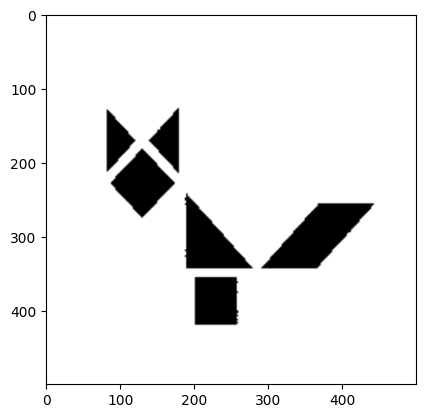

In [9]:
img = cv2.imread("../mam.png")
# k = 0.5
# img = cv2.resize(img, (int(img.shape[1] * k), int(img.shape[0] * k)))
img = cv2.resize(img, (500, 500))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.line(img, (140, 140), (140, 140), 255, 150)

orig = img.copy()
mask = create_circular_mask(orig.shape[0], orig.shape[1])
orig[~mask] = 255
stopping_point = np.mean(orig) * 1.1
# stopping_point = 200
print(stopping_point)

canvas = np.full_like(img, 255)
# img_16 = img.astype(np.int16)
# canvas = np.full_like(img, 255)
canvas[0, 0] = 0
canvas[0, 1] = 255

imshow(orig, cmap="gray")


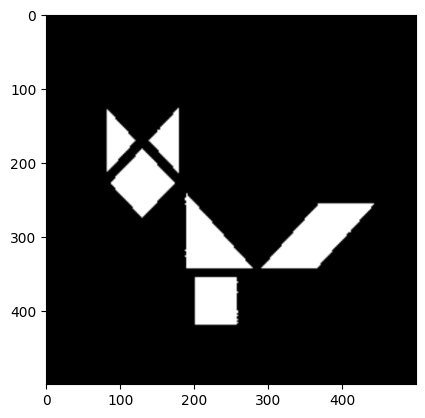

In [10]:
# preprocess
imgcircle = img.copy()
imgcircle[~mask] = 255
imginverted = np.full(img.shape, 255) - imgcircle

img = imginverted

imshow(img, cmap="gray")


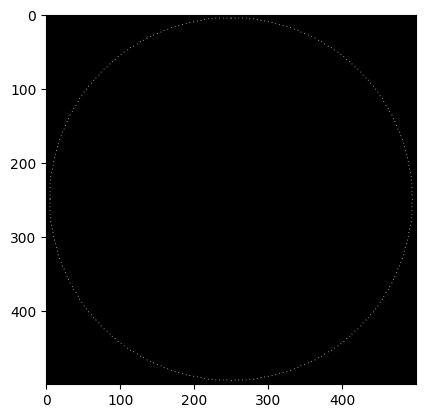

In [11]:
def generate_circle_points(center, radius, n):
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    points = [
        (center[0] + radius * np.cos(angle), center[1] + radius * np.sin(angle))
        for angle in angles
    ]
    return points


center = (img.shape[0] // 2, img.shape[1] // 2)
radius = min(img.shape) // 2 - 5
n = 300
circle_points = generate_circle_points(center, radius, n)

# Plot the points on the image
img_gray = np.full_like(img, 0, dtype=np.uint8)
for point in circle_points:
    img_gray[int(point[1]), int(point[0])] = 255
    cv2.line(
        img_gray, (int(point[1]), int(point[0])), (int(point[1]), int(point[0])), 255, 1
    )

imshow(img_gray, cmap="gray")

spagat = [0]


In [12]:
# for _ in tqdm(range(10000)):
while True:
    from_pos = circle_points[spagat[-1]]
    best = [-1, -math.inf]
    for indx, to_pos in enumerate(circle_points):
        if indx == spagat[-1]:
            continue

        lajna = []

        for x, y in line_iter(
            int(from_pos[0]), int(from_pos[1]), int(to_pos[0]), int(to_pos[1])
        ):
            # print("herke")
            lajna.append(img[y, x])
            # brehem

        # print(lajna)
        lajna = np.array(lajna)

        prekryv = np.sum(lajna)
        # print(error)

        if prekryv > best[1]:
            # print(error, indx)
            best = [indx, prekryv]
            bst = (from_pos, to_pos)
            best_lajna = lajna

        # break

    canvas_w_line = cv2.line(
        np.full_like(canvas, 0),
        tuple(map(int, from_pos)),
        tuple(map(int, circle_points[best[0]])),
        16,
        1,
    )

    canvas = cv2.subtract(canvas, canvas_w_line)
    img = cv2.subtract(img, canvas_w_line, dtype=cv2.CV_8U)

    spagat.append(best[0])
    start = best[0]

    print(np.mean(canvas))
    if np.mean(canvas) < stopping_point:
        break


254.97274
254.946564
254.921348
254.896132
254.871172
254.846276
254.8217
254.79706
254.771588
254.746116
254.721156
254.696196
254.670468
254.64474
254.6201
254.595524
254.57146
254.547396
254.522244
254.497092
254.472772
254.448452
254.424708
254.4009
254.376516
254.35226
254.32826
254.304132
254.278148
254.252164
254.22778
254.203396
254.17722
254.151044
254.122244
254.093444
254.067972
254.042564
254.019076
253.995524
253.970308
253.945092
253.916484
253.887876
253.862148
253.836484
253.813252
253.789956
253.764492
253.739084
253.71534
253.69166
253.667148
253.642648
253.617248
253.59152
253.563104
253.534688
253.51056
253.486624
253.462432
253.438048
253.41392
253.389856
253.36528
253.340832
253.317216
253.293472
253.267552
253.241504
253.215712
253.190048
253.16656
253.143072
253.12018
253.097268
253.072372
253.047796
253.023796
252.999476
252.976244
252.953332
252.93074
252.908084
252.881844
252.855412
252.826484
252.797556
252.768948
252.74034
252.716532
252.693172
252.667636
2

199.9877


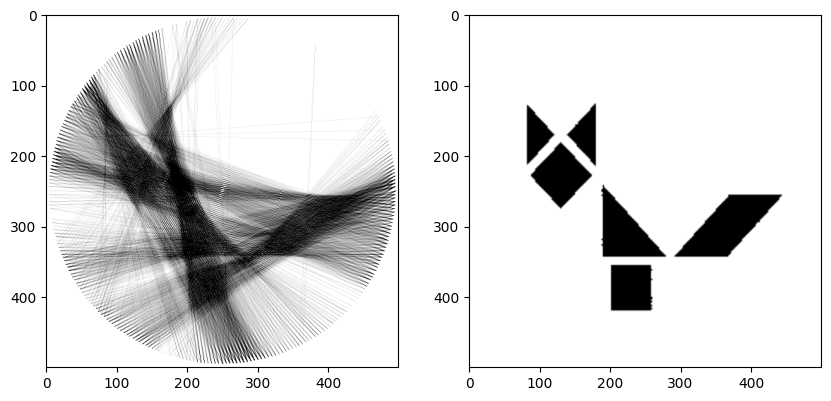

In [13]:
print(np.mean(canvas))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
imshow(
    canvas,
    cmap="gray",
)
plt.subplot(1, 2, 2)
imshow(orig, cmap="gray")
